# FINAL PROJECT THICKET

In [193]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print("done")

done


Read in all the files

# MPI Thicket Variables

In [194]:
mpi_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/random/*.cali"))
mpi_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/perturbed/*.cali"))
mpi_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/sorted/*.cali"))
mpi_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/mpi/reverse/*.cali"))

# CUDA Thicket Variables

In [195]:
cuda_random_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/random/*.cali"))
cuda_perturbed_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/perturbed/*.cali"))
cuda_sorted_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/sorted/*.cali"))
cuda_reverse_tk = th.Thicket.from_caliperreader(glob("sample_ProjectOuts/cuda/reverse/*.cali"))

In [196]:
tks = {}

tks["mpi_sorted"] = mpi_sorted_tk
tks["mpi_reverse"] = mpi_reverse_tk
tks["mpi_random"] = mpi_random_tk
tks["mpi_perturbed"] = mpi_perturbed_tk

tks["cuda_sorted"] = cuda_sorted_tk
tks["cuda_reverse"] = cuda_reverse_tk
tks["cuda_random"] = cuda_random_tk
tks["cuda_perturbed"] = cuda_perturbed_tk


In [197]:
for i in tks.values():
    i.statsframe.dataframe["time"] = 1

print(tks["cuda_random"].tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  └─ 1.000 cudaMemcpy
│  └─ 1.000 comm_small
│     └─ 1.000 cudaMemcpy
├─ 1.000 comp
│  ├─ 1.000 comp_large
│  └─ 1.000 comp_small
├─ 1.000 correctness_check
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [198]:
# Performance data
tks["mpi_random"].dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              22361798      1   
                                                  116293393     1   
                                                  134818634     1   
                                                  146744629     1   
                                                  253356140     1   
                                                  580301485     1   
                                                  711363963     1   
                                                  796617537     1   
                                                  810973511     1   
                                                  941793176     1   
                                                  951418867     1   
                                                  1033541349    1   
                                                  1075687522    1   
                                                  1362906779    1   
                                                  1403911938    1   
                                                  1435201546    1   
                                                  1496506446    1   
                                                  1520814698    1   
                                                  1648651909    1   
                                                  1697589512    1   
                                                  1881801213    1   
                                                  1885136986    1   
                                                  2019179125    1   
                                                  2152020772    1   
                                                  2160855856    1   
                                                  2200215911    1   
                                                  2203361165    1   
                                                  2232519014    1   
                                                  2239690746    1   
                                                  2358279917    1   
                                                  2441435745    1   
                                                  2462135126    1   
                                                  2503756247    1   
                                                  2523424627    1   
                                                  2536232340    1   
                                                  2634403804    1   
                                                  2761994045    1   
                                                  2763097266    1   
                                                  2808852794    1   
                                                  2822370982    1   
                                                  2991430386    1   
                                                  3003539304    1   
                                                  3034853663    1   
                                                  3086508677    1   
                                                  3252180464    1   
                                                  3306545231    1   
                                                  3347448399    1   
                                                  3374329485    1   
                                                  3447244011    1   
                                                  3472221710    1   
                                                  3507915738    1   
                                                  3516945613    1   
                                                  3559501564    1   
                                                  3646086970    1   
                                                  3661965729    1   
                                                  3680149479    1   
                                                  3788723603

In [199]:
tks.keys()

dict_keys(['mpi_sorted', 'mpi_reverse', 'mpi_random', 'mpi_perturbed', 'cuda_sorted', 'cuda_reverse', 'cuda_random', 'cuda_perturbed'])

In [200]:
gbs = {}

for i in tks.keys():
    if "mpi" in i:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")
    else:
        gbs[i + "_strong"] = tks[i].groupby("InputSize")
        gbs[i + "_weak"] = tks[i].groupby("InputSize")


7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b63a3477760>, 262144: <thicket.thicket.Thicket object at 0x2b63ab52b220>, 1048576: <thicket.thicket.Thicket object at 0x2b63aae01be0>, 4194304: <thicket.thicket.Thicket object at 0x2b63acbdac40>, 16777216: <thicket.thicket.Thicket object at 0x2b63ac6e46a0>, 67108864: <thicket.thicket.Thicket object at 0x2b63aa901970>, 268435456: <thicket.thicket.Thicket object at 0x2b63acea9d60>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b63aa56f580>, 262144: <thicket.thicket.Thicket object at 0x2b63a37729d0>, 1048576: <thicket.thicket.Thicket object at 0x2b63ab9a6310>, 4194304: <thicket.thicket.Thicket object at 0x2b63a3353ca0>, 16777216: <thicket.thicket.Thicket object at 0x2b63a33a2370>, 67108864: <thicket.thicket.Thicket object at 0x2b63ae0172e0>, 268435456: <thicket.thicket.Thicket object at 0x2b63ac8498b0>}
7  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b63a2692a30>, 262144: <thic

Compose these 3 groups column-wise to get a holistic view of the data

In [201]:
print(gbs.keys())

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])


In [202]:
ctks = {}

for i in gbs.keys():
#     if "strong" in i:
    if "mpi" in i:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_procs"
        )
    else:
        ctks[i] = th.Thicket.concat_thickets(
            thickets=list(gbs[i].values()),
            headers=list(gbs[i].keys()),
            axis="columns",
            metadata_key="num_threads"
        )
#     else:
#         ctks[i] = th.Thicket.concat_thickets(
#             thickets=list(gbs[i].values()),
#             headers=list(gbs[i].keys()),
#             axis="columns",
#             metadata_key="InputSize"
#         )

In [203]:
# mpi_strong_random_ctk.dataframe

ctks["mpi_random_strong"].dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
                                                  128           1   
                                                  256           1   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'comm', 'type': 'function'}              2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
                                                  128           3   
                                                  256           3   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Barrier', 'type': 'function'}       2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
                                                  128           4   
                                                  256           4   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'comm_large', 'type': 'function'}        2            13   
                                                  4            13   
                                                  8            13   
                                                  16           13   
                                                  32           13   
                                                  64           13   
                                                  128          13   
                                                  256          13   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Alltoallv', 'type': 'function'}     2            14   
                                                  4            14   
                                                  8            14   
                                                  16           14   
                                                  32           14   
                                                  64           14   
                                                  128          14   
                                                  256          14   
                                                  512        <NA>   
                                                  1024       <NA>   
{'name': 'MPI_Gatherv', 'type': 'function'}       2            15   
                                                  4            15   
                                                  8            15   
                                                  16           15   
                                                  32           15   
                                                  64      

Perform pandas operations to get the table in a desirable format for plotting

In [204]:
for i in ctks.keys():
    if "cuda" in i:
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])

    else:
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            ctks[i].dataframe = ctks[i].dataframe.drop([(inputSize, "nid"), (inputSize, "spot.channel")], axis=1)

        ctks[i].dataframe = ctks[i].dataframe.reset_index().drop([("node", "")], axis=1)
        ctks[i].dataframe = ctks[i].dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [206]:
ctks["mpi_sorted_strong"].dataframe

65536                              \
                            Min time/rank Max time/rank Avg time/rank   
name              num_procs                                             
main              2              0.301731      0.302747      0.302239   
                  4              1.342491      1.343025      1.342847   
                  8              0.979378      0.980998      0.980529   
                  16             1.248135      1.251634      1.250110   
                  32             1.444485      1.454327      1.449019   
                  64             1.675640      1.681816      1.678411   
                  128            1.816234      1.839233      1.826481   
                  256            2.109040      2.147894      2.129480   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm              2              0.008680      0.010531      0.009606   
                  4              0.013558      0.014769      0.014210   
                  8              0.026550      0.032322      0.028182   
                  16             0.038542      0.044259      0.040915   
                  32             0.052030      0.059237      0.054993   
                  64             0.024615      0.044888      0.034704   
                  128            0.036675      0.059633      0.047014   
                  256            0.048793      0.094924      0.073333   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Barrier       2              0.007973      0.009658      0.008816   
                  4              0.009149      0.010521      0.009845   
                  8              0.025501      0.031087      0.026957   
                  16             0.036592      0.042180      0.038949   
                  32             0.049601      0.056596      0.052436   
                  64             0.012331      0.029346      0.020828   
                  128            0.013900      0.035383      0.022930   
                  256            0.015319      0.064053      0.039412   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
comm_large        2              0.000409      0.000561      0.000485   
                  4              0.001050      0.001553      0.001390   
                  8              0.000176      0.000404      0.000317   
                  16             0.000305      0.000630      0.000513   
                  32             0.001004      0.001374      0.001181   
                  64             0.001264      0.005447      0.003199   
                  128            0.001804      0.004831      0.003330   
                  256            0.002038      0.008723      0.007000   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Alltoallv     2              0.000139      0.000283      0.000211   
                  4              0.000981      0.001037      0.001013   
                  8              0.000112      0.000141      0.000132   
                  16             0.000146      0.000190      0.000176   
                  32             0.000681      0.000777      0.000740   
                  64             0.001010      0.001121      0.001057   
                  128            0.001280      0.001603      0.001432   
                  256            0.001658      0.002522      0.001925   
                  512                 NaN           NaN           NaN   
                  1024                NaN           NaN           NaN   
MPI_Gatherv       2              0.000252      0.000257      0.000254   
                  4              0.000045      0.000487      0.000350   
                  8  

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [207]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

# Examples

In [208]:
ctks["mpi_random_strong"].dataframe.loc["main"][262144]

Min time/rank  Max time/rank  Avg time/rank   Total time  \
num_procs                                                             
2               0.329483       0.330581       0.330032     0.660063   
4               0.490914       0.496598       0.493044     1.972178   
8               0.799785       0.807662       0.804979     6.439832   
16              0.656338       0.660717       0.658608    10.537731   
32              1.431100       1.440347       1.435205    45.926544   
64              1.370681       1.386167       1.377728    88.174613   
128             1.585454       1.608739       1.595120   204.175372   
256             1.858605       1.908185       1.885634   482.722228   
512             2.545665       2.603312       2.576150  1318.988894   
1024                 NaN            NaN            NaN          NaN   

           Variance time/rank  
num_procs                      
2                    0.000000  
4                    0.000005  
8                    0.000008  
16                   0.000001  
32                   0.000008  
64                   0.000012  
128                  0.000020  
256                  0.000130  
512                  0.000141  
1024                      NaN

In [209]:
ctks.keys()

dict_keys(['mpi_sorted_strong', 'mpi_sorted_weak', 'mpi_reverse_strong', 'mpi_reverse_weak', 'mpi_random_strong', 'mpi_random_weak', 'mpi_perturbed_strong', 'mpi_perturbed_weak', 'cuda_sorted_strong', 'cuda_sorted_weak', 'cuda_reverse_strong', 'cuda_reverse_weak', 'cuda_random_strong', 'cuda_random_weak', 'cuda_perturbed_strong', 'cuda_perturbed_weak'])

In [210]:
# function_names = ("main", "comp", "comm", "comm_small", "comm_large", "comp_small", "comp_large")
function_names = ("main", "comm", "comp_large")
# function_names = set(ctks["mpi_strong_perturbed"].dataframe.index.get_level_values("name"))

# MPI STRONG SCALING TIME PLOTS

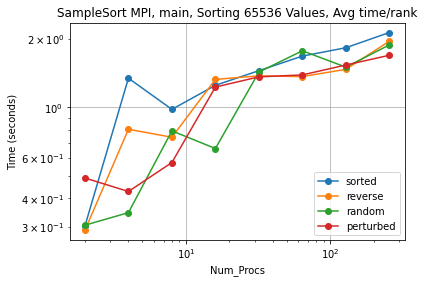

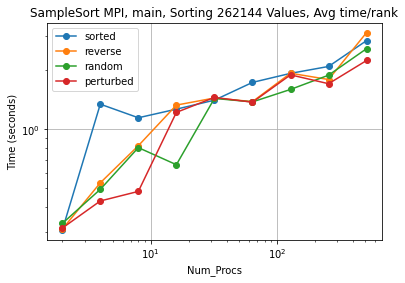

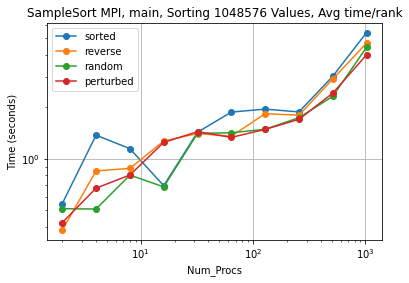

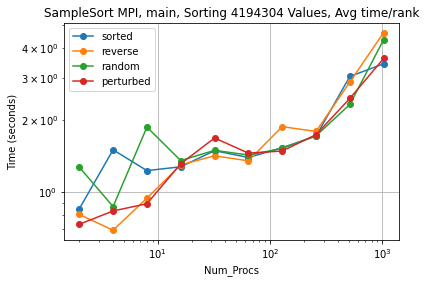

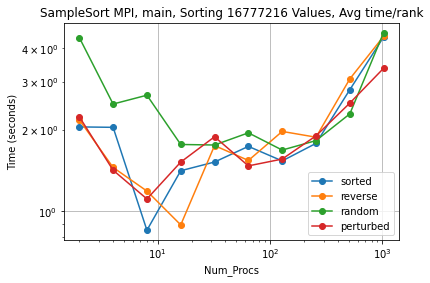

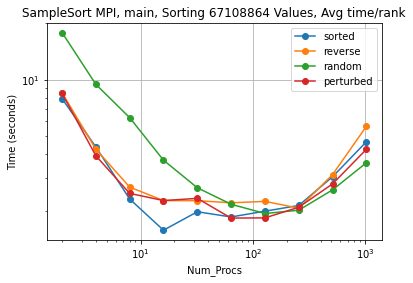

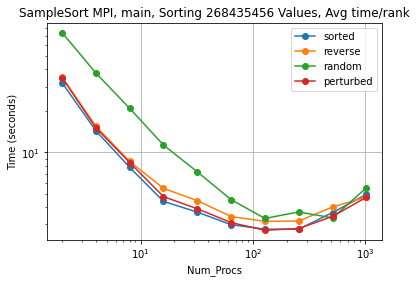

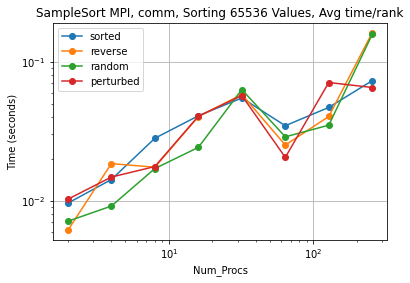

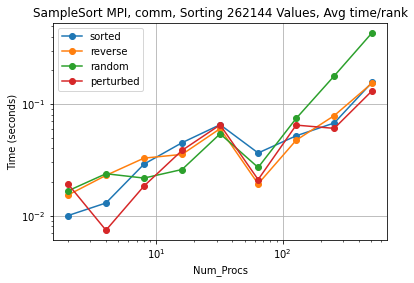

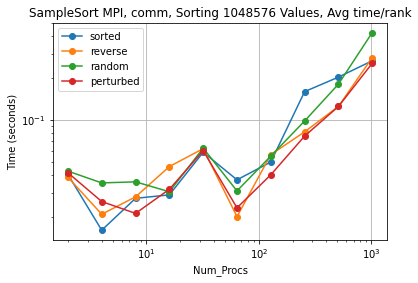

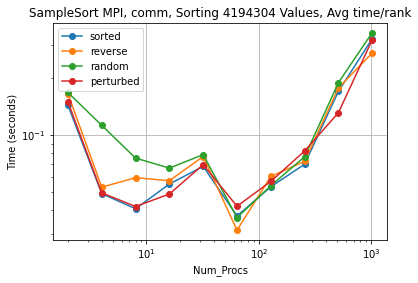

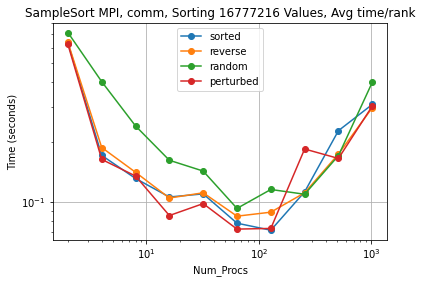

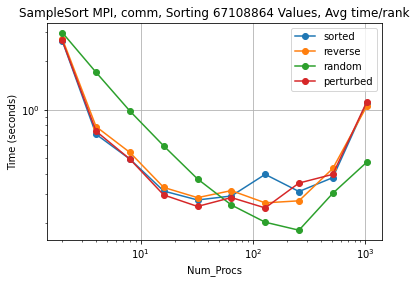

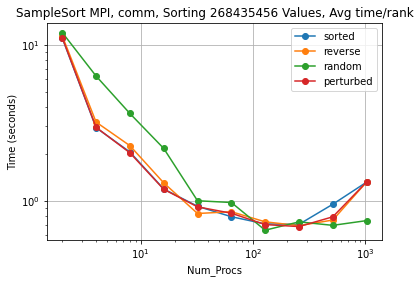

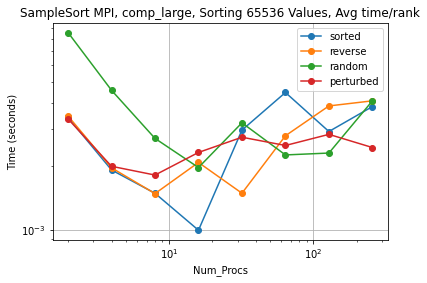

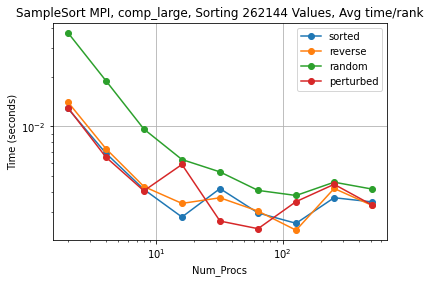

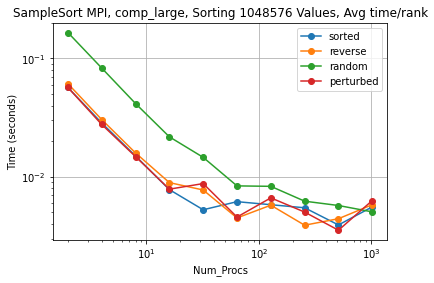

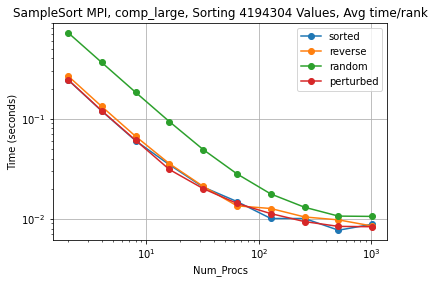

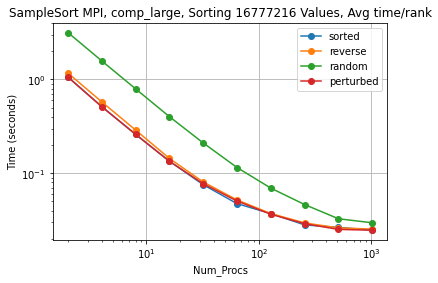

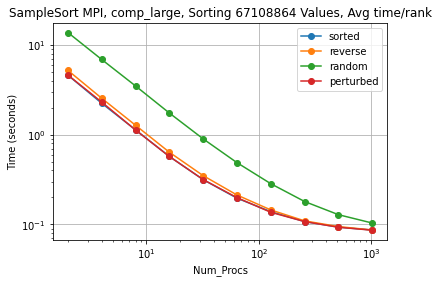

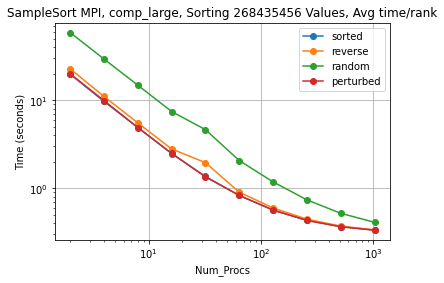

In [211]:
for name in function_names:
    for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "mpi" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort MPI, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Procs",
            ylabel="Time (seconds)",
            loglog=True
        )

# MPI WEAK SCALING TIME PLOTS

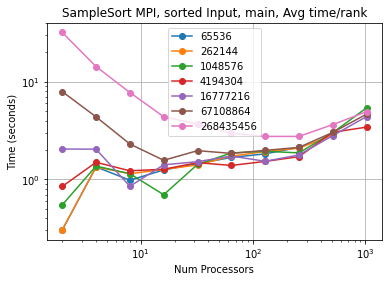

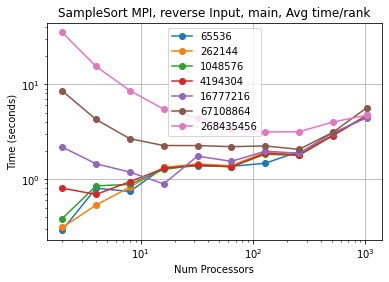

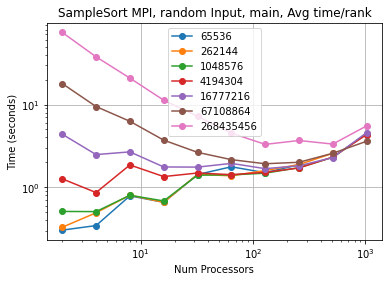

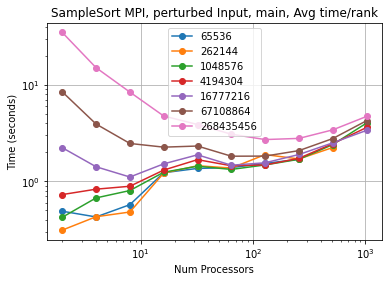

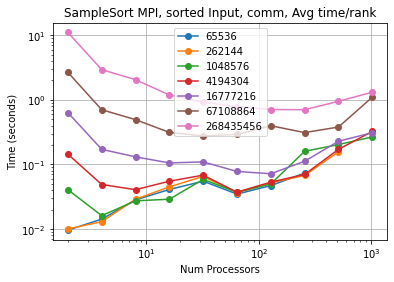

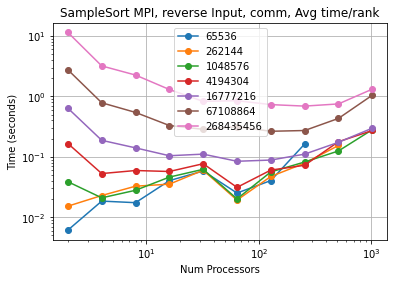

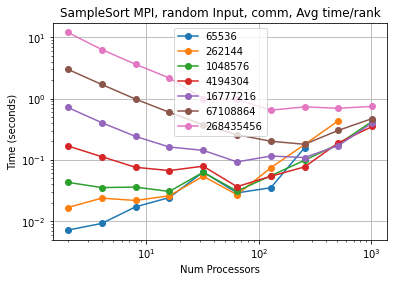

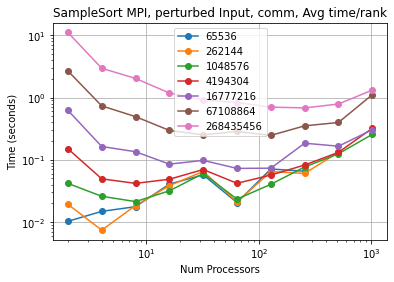

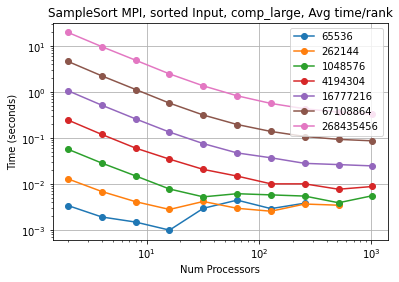

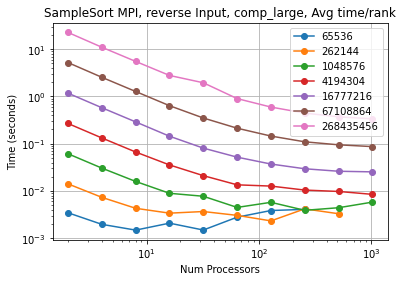

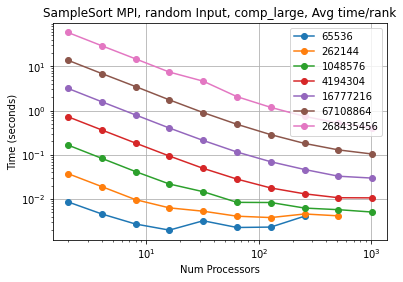

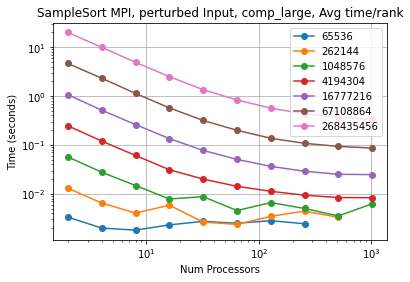

In [212]:
for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "mpi" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]: #[262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0]: #[256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0, 32768.0, 65536.0, 131072.0, 262144.0, 524288.0, 1048576.0, 2097152.0, 4194304.0, 8388608.0, 16777216.0, 33554432.0, 67108864.0, 134217728.0]: # for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputSize)    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

            plot_pandas(
                df=masterDF,
                title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num Processors",
                ylabel="Time (seconds)",
                loglog=True
            )

# CUDA STRONG SCALING TIME PLOTS

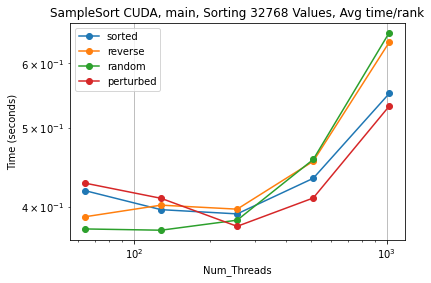

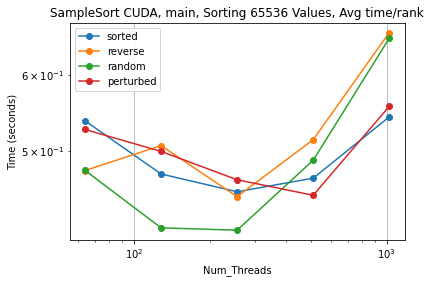

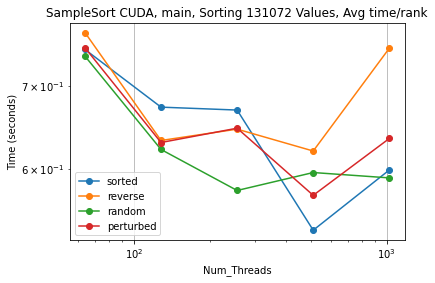

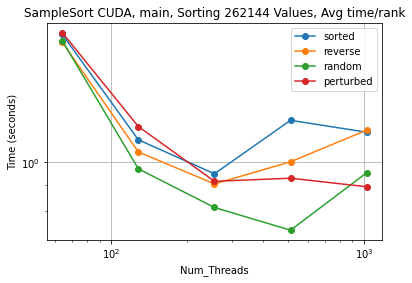

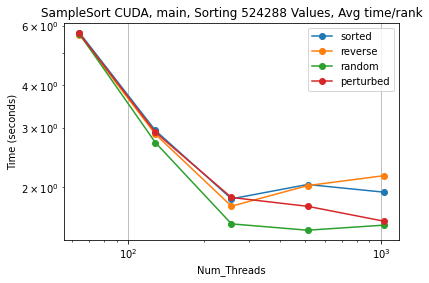

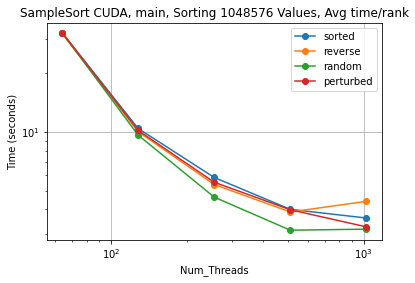

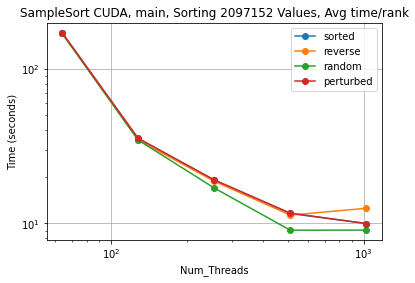

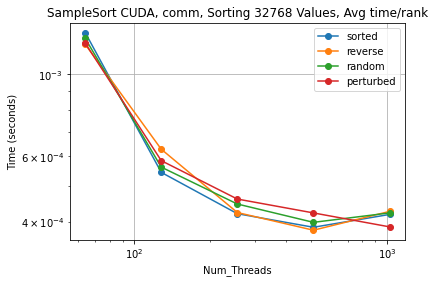

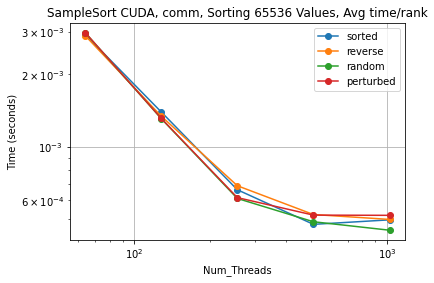

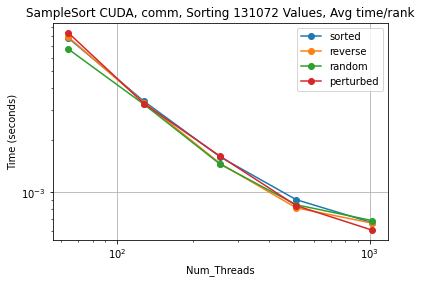

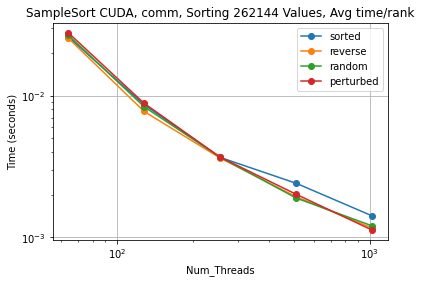

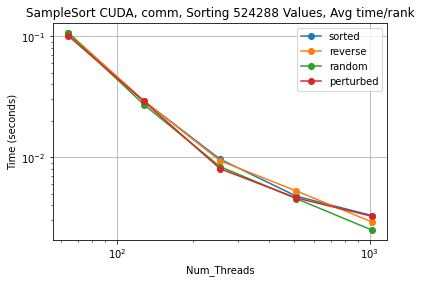

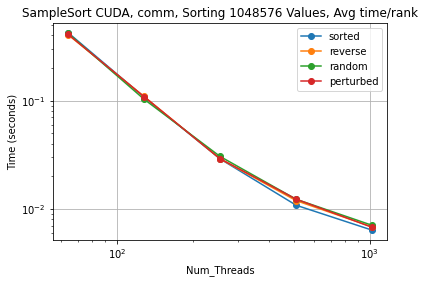

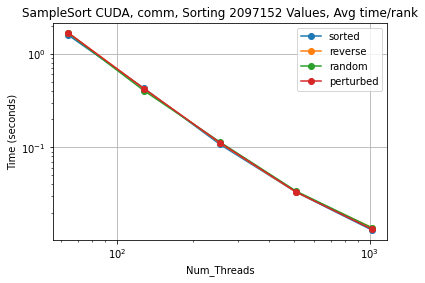

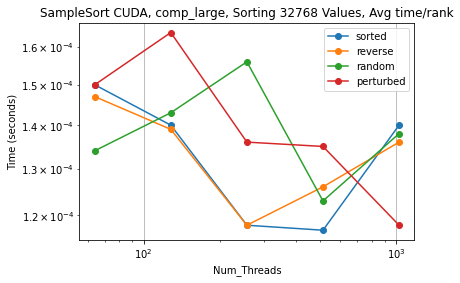

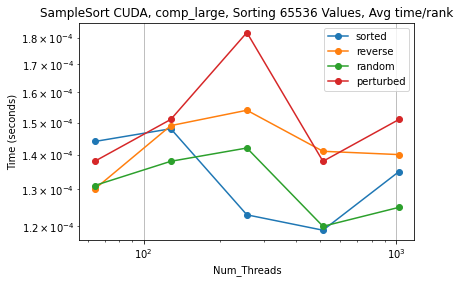

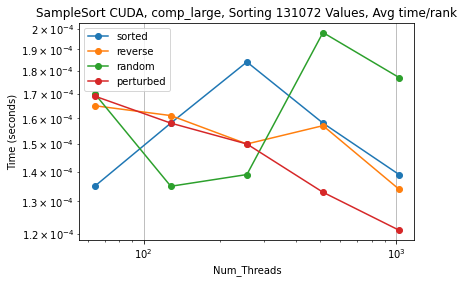

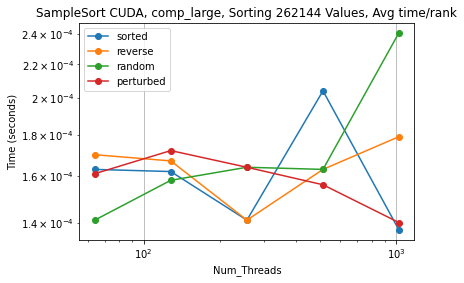

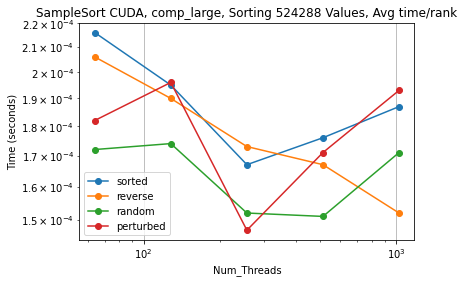

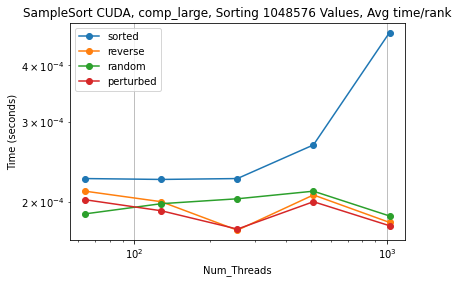

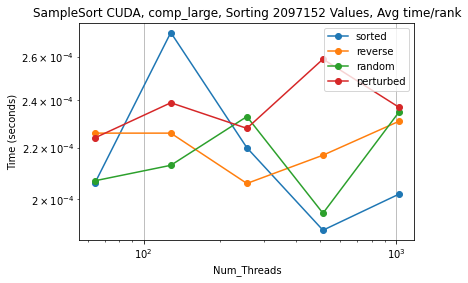

In [213]:
for name in function_names:
    for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
        masterDF = pd.DataFrame()
        for inputType in ctks.keys():
            if("strong" in inputType and "cuda" in inputType):
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputType.split('_')[1])    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

        plot_pandas(
            df=masterDF,
            title="SampleSort CUDA, " + str(name) + ", Sorting " + str(inputSize) + " Values, Avg time/rank",
            xlabel="Num_Threads",
            ylabel="Time (seconds)",
            loglog=True
        )

# CUDA WEAK SCALING TIME PLOTS

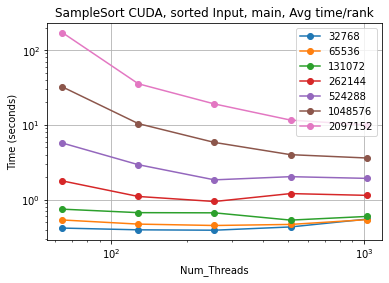

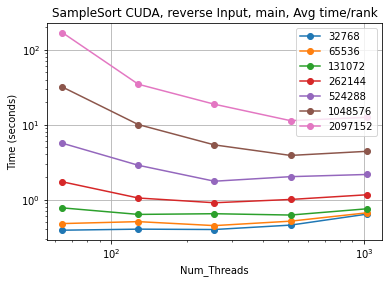

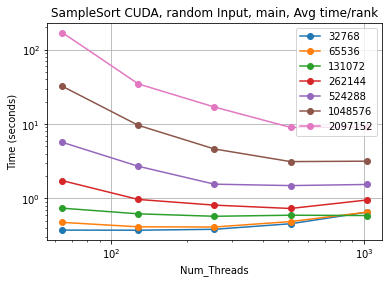

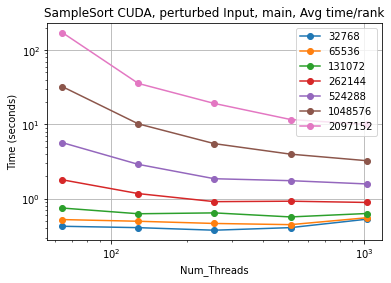

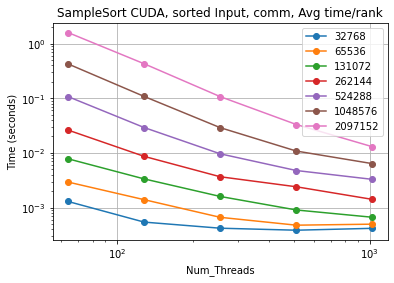

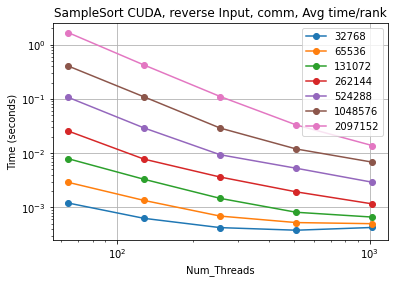

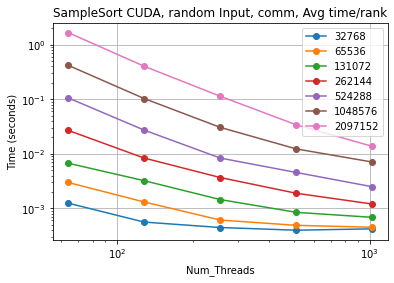

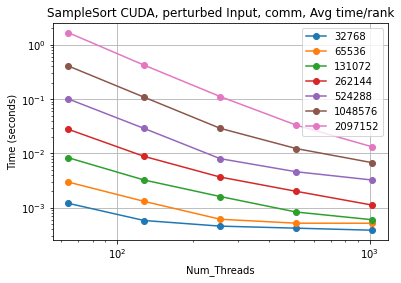

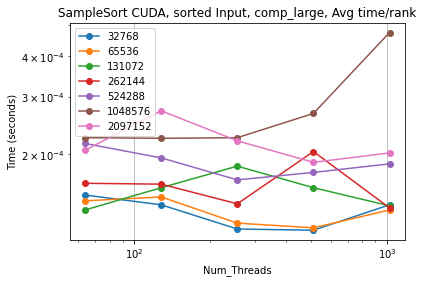

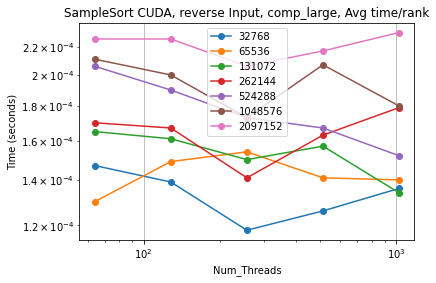

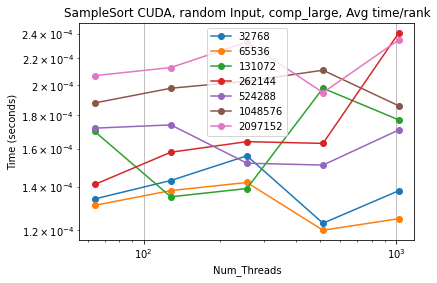

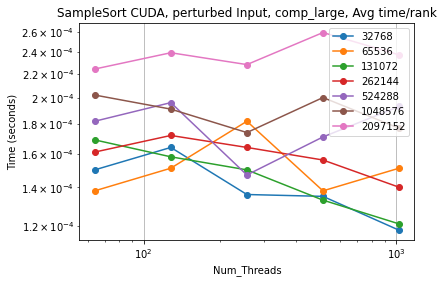

In [214]:
for name in function_names:
    for inputType in ctks.keys():
        if "weak" in inputType and "cuda" in inputType:
            masterDF = pd.DataFrame()
            for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]: #[64, 128, 256, 512, 1024]: 
                tempDF = ctks[inputType].dataframe.loc[name][(inputSize, "Avg time/rank")]
                tempDF = tempDF.rename(inputSize)    
                masterDF = pd.concat([masterDF, tempDF], axis=1) 

            plot_pandas(
                df=masterDF,
                title="SampleSort CUDA, " + str(inputType.split("_")[1]) + " Input, " + str(name) + ", Avg time/rank",
                xlabel="Num_Threads",
                ylabel="Time (seconds)",
                loglog=True
            )

## Speedup

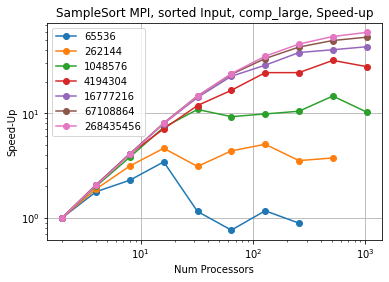

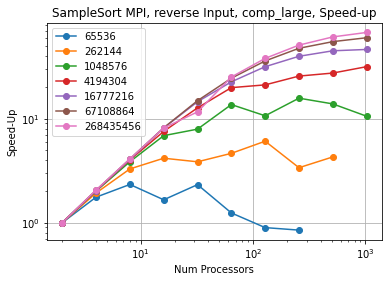

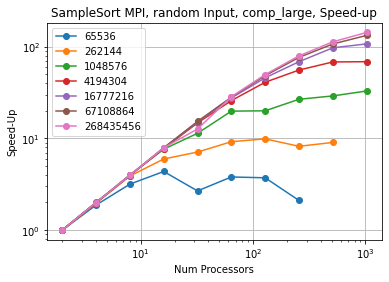

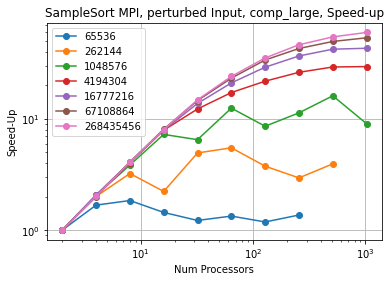

In [215]:
for inputType in ctks.keys():
    if("mpi" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]:
            tempDF = ctks[inputType].dataframe.loc["comp_large"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][2] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="SampleSort MPI, " + str(inputType.split("_")[1]) + " Input, comp_large, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )

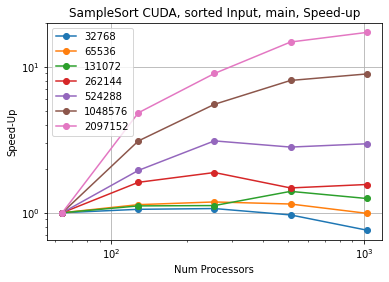

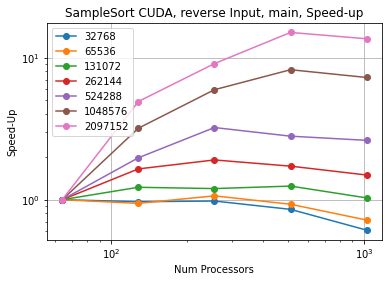

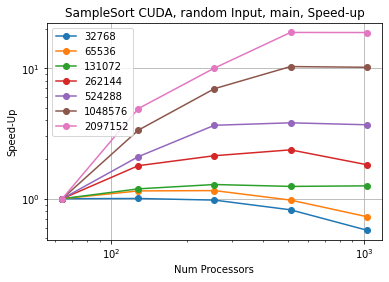

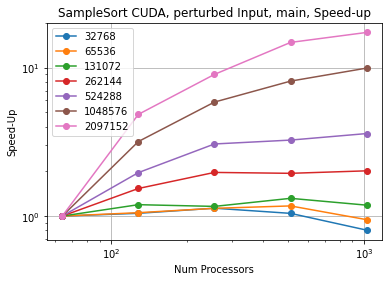

In [216]:
for inputType in ctks.keys():
    if("cuda" in inputType and "strong" in inputType):
        masterDF = pd.DataFrame()
        for inputSize in [32768, 65536, 131072, 262144, 524288, 1048576, 2097152]:
            tempDF = ctks[inputType].dataframe.loc["main"][(inputSize, "Avg time/rank")]
            tempDF = tempDF.rename(inputSize)    
            masterDF = pd.concat([masterDF, tempDF], axis=1) 

        for inputSize in masterDF.columns:
            masterDF[inputSize] = masterDF[inputSize][64] / masterDF[inputSize]

        plot_pandas(
            df=masterDF,
            title="SampleSort CUDA, " + str(inputType.split("_")[1]) + " Input, main, Speed-up",
            xlabel="Num Processors",
            ylabel="Speed-Up",
            loglog=True
        )